# 새 모델 테스트
## 방법
1. 유저 카테고리 선호도를 분산/표준편차를 구한다.
2. 분산이 높은 순으로 나열.
3. 임의의 방법으로 해당 선호도를 x,y좌표계로 변환.
4. 성별은 z축이 되어 구분됨.
5. sequential 모델에 train
6. 좌표 - 선호 카테고리 간의 상관관계 학습,
7. profit!

In [1]:
import pandas as pd

df = pd.read_csv("./survey_data_after.csv", encoding = "euc-kr")
df

,성별,휴양,자연경관,문화유산,액티비티,쇼핑,공연,전시물,경험
0,남성,5,4,4,3,3,3,4,문화유산
1,남성,3,3,3,5,4,4,3,문화유산
2,여성,5,5,4,4,3,5,4,"문화유산, 쇼핑, 전시물"
3,여성,5,1,1,5,3,3,1,쇼핑
4,남성,5,5,4,5,5,5,5,쇼핑
...,...,...,...,...,...,...,...,...,...
144,남성,4,5,4,3,2,2,2,"휴양, 자연경관, 액티비티"
145,남성,3,4,1,4,2,5,5,"휴양, 자연경관, 액티비티"
146,여성,4,5,4,5,2,4,4,"휴양, 자연경관, 액티비티, 쇼핑"
147,여성,4,4,3,3,4,4,3,"휴양, 전시물"


In [2]:
df.loc[:, "성별"]

0      남성
1      남성
2      여성
3      여성
4      남성
       ..
144    남성
145    남성
146    여성
147    여성
148    여성
Name: 성별, Length: 149, dtype: object

In [3]:
import numpy as np
var_arr = np.array([np.var(df.loc[:, "휴양"]), np.var(df.loc[:, "자연경관"]), np.var(df.loc[:, "문화유산"]), np.var(df.loc[:, "액티비티"]), np.var(df.loc[:, "쇼핑"]), np.var(df.loc[:, "공연"]), np.var(df.loc[:, "전시물"])])
var_arr
# 2,6,3,5,4,1,0
#x = 2 * 3 * 4/ y = 6 * 5 * 1

array([0.65870907, 1.19300932, 1.74802937, 1.44434935, 1.23363812,
       1.41498131, 1.59938741])

In [6]:
gender_data = df.loc[:, '성별']
want_data = df.loc[:, '경험']
#exp_data = df.loc[:, '경험']
personal_data = np.zeros(shape = (gender_data.size, 7))

for i in range(gender_data.size):
    for j in range(1, df.loc[i].size - 1):
        personal_data[i][j-1] = df.iloc[i][j]
        

In [15]:
new_input = np.zeros(shape = (gender_data.size, 3))
for i in range(gender_data.size):
    xpos = personal_data[i][2] * 25 + personal_data[i][3]*5 + personal_data[i][4]
    ypos = personal_data[i][6] * 25 + personal_data[i][5]*5 + personal_data[i][1]
    new_input[i] = np.array([xpos, ypos, 0 if gender_data[i] == '여성' else 1])
    

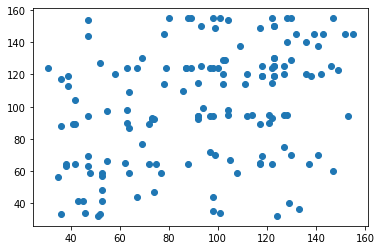

In [17]:
import matplotlib.pyplot as plt

plt.scatter(new_input[:, 0], new_input[:, 1])
plt.show()

In [21]:
from ast import literal_eval
dataset = []
target = pd.read_csv("./survey_norm.csv")

for i in range(target['input_data'].size):
    dataset.append( [new_input[i]
                     , np.array(literal_eval(target['want_hot_vec'][i].replace(' ', ',').replace(',,', ',')), dtype = int)])

In [24]:
import random
random.shuffle(dataset)

In [28]:
import tensorflow as tf
from keras import models 
from keras import layers
from keras import regularizers

def build_model(train_len):
    model = models.Sequential()
    model.add(layers.Dense(16, activation = 'relu', input_shape = (train_len, )))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(7))
    
    model.compile(optimizer = 'rmsprop', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
    #model.compile(optimizer = 'adam', loss='mse', metrics=['accuracy'])
    return model

AlreadyExistsError: Another metric with the same name already exists.

In [ ]:
!pip3 uninstall keras